In [12]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr, spearmanr, chi2_contingency, shapiro, ttest_1samp


In [18]:
data = pd.read_csv("health_lifestyle_dataset.csv")
# Generate a random sample of the data  
sample_size = 150
ds = data.sample(n=sample_size, replace=False, random_state=42)   
print("Random sample size:", len(ds))
print(ds.head())


Random sample size: 150
          id  age  gender   bmi  daily_steps  sleep_hours  water_intake_l  \
75721  75722   67  Female  25.2         9979          8.8             1.8   
80184  80185   62  Female  26.3        19056          8.5             4.4   
19864  19865   44    Male  31.3        14609          3.0             0.5   
76699  76700   28    Male  35.1         2832          8.0             4.0   
92991  92992   38    Male  28.7        11409          5.5             4.2   

       calories_consumed  smoker  alcohol  resting_hr  systolic_bp  \
75721               2792       0        1          73          110   
80184               1412       0        0          75          173   
19864               1514       1        1          83          156   
76699               2619       0        0          60          150   
92991               3216       0        0          77          104   

       diastolic_bp  cholesterol  family_history  disease_risk  
75721            95        

In [17]:
#  Descriptive Statistics

from matplotlib.colors import Normalize 
def desc_stat(ds, var):
    mean = ds[var].mean()
    median = ds[var].median()
    mode = ds[var].mode()
    minimum = ds[var].min()
    maximum = ds[var].max()
    v_range = ds[var].max() - ds[var].min()
    std_dev = ds[var].std()
    variance = ds[var].var()
    skew = ds[var].skew()
    kurtosis = ds[var].kurt()
    count = ds[var].count()
    
    quartiles = [
        ds[var].quantile(0),
        ds[var].quantile(0.25),
        ds[var].quantile(0.50),
        ds[var].quantile(0.75),
        ds[var].quantile(1),
        ds[var].quantile(0.75) - ds[var].quantile(0.25)
    ]
    
    summary = {
        "Average": mean,
        "Median": median,
        "Mode": mode,  
        "Minimum": minimum,
        "Maximum": maximum,
        "Range": v_range,
        "Std Dev": std_dev,
        "Variance": variance,
        "Skewness": skew,
        "Kurtosis": kurtosis,
        "Minimum": quartiles[0],
        "25th pecentile": quartiles[1],
        "50th pecentile": quartiles[2],
        "75th pecentile": quartiles[3],
        "Mazimum": quartiles[4],
        "IQR": quartiles[5],
        "Count": count
    }
    
    return summary



chol_stats = desc_stat(ds, 'cholesterol')
print(chol_stats)


{'Average': np.float64(223.62666666666667), 'Median': 224.0, 'Mode': 0    275
Name: cholesterol, dtype: int64, 'Minimum': np.float64(150.0), 'Maximum': 298, 'Range': 148, 'Std Dev': 42.16005722311022, 'Variance': 1777.4704250559284, 'Skewness': np.float64(0.01330299526609705), 'Kurtosis': np.float64(-1.0948073714352557), '25th pecentile': np.float64(189.25), '50th pecentile': np.float64(224.0), '75th pecentile': np.float64(257.0), 'Mazimum': np.float64(298.0), 'IQR': np.float64(67.75), 'Count': np.int64(150)}


In [21]:
#Systematic Sampling
def systematic_sample(df, step):
    return df.iloc[::step, :]

step_value = max(1, len(data) // 150)
sys_sample = systematic_sample(data, step_value)

print("Systematic sample size:", len(sys_sample))

# Apply descriptive stats function to cholesterol from systematic sample
chol_sys_stats = desc_stat(sys_sample, 'cholesterol')
print(chol_sys_stats)

Systematic sample size: 151
{'Average': np.float64(216.17880794701986), 'Median': 214.0, 'Mode': 0    174
Name: cholesterol, dtype: int64, 'Minimum': np.float64(150.0), 'Maximum': 297, 'Range': 147, 'Std Dev': 44.78125889144777, 'Variance': 2005.3611479028698, 'Skewness': np.float64(0.24933735714089933), 'Kurtosis': np.float64(-1.203066094346008), '25th pecentile': np.float64(174.0), '50th pecentile': np.float64(214.0), '75th pecentile': np.float64(250.5), 'Mazimum': np.float64(297.0), 'IQR': np.float64(76.5), 'Count': np.int64(151)}


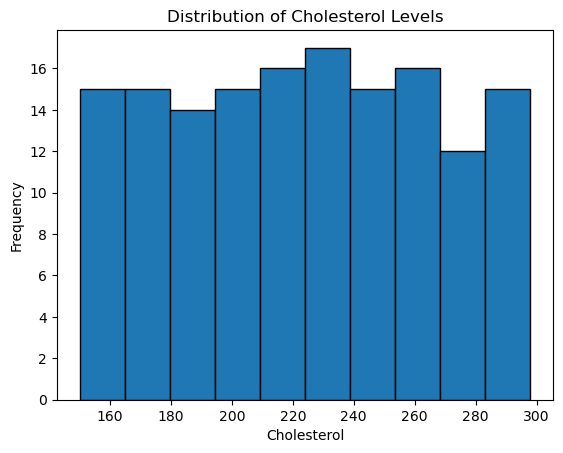

In [22]:
#  Histogram: Cholesterol 
import pandas as pd
import matplotlib.pyplot as plt

# load the data into a pandas dataframe
data = pd.read_csv("health_lifestyle_dataset.csv")

# create a histogram
plt.hist(ds['cholesterol'], bins=10, edgecolor='black')

# labels and title 
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')
plt.title('Distribution of Cholesterol Levels')

# display the plot 
plt.show()


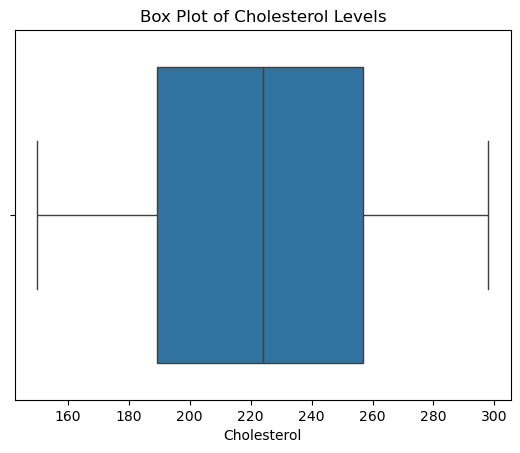

In [23]:
# Box Plot: Cholesterol
import pandas as pd
import seaborn as sns

# load the data into a pandas dataframe
data = pd.read_csv("health_lifestyle_dataset.csv")


sns.boxplot(x=ds['cholesterol'])
plt.xlabel('Cholesterol')
plt.title('Box Plot of Cholesterol Levels')
plt.show()


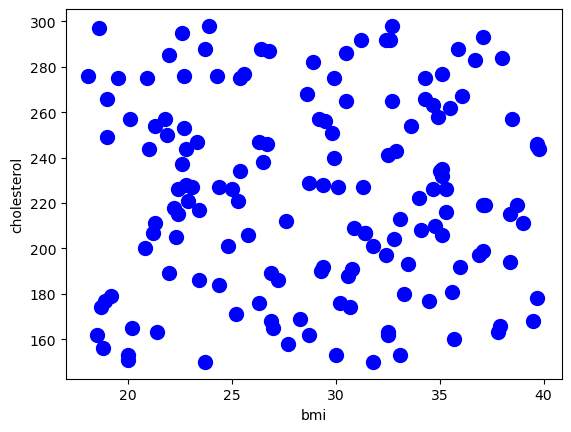

In [28]:
# Scatter Plot BMI vs Cholesterol 
ds.plot.scatter(x='bmi', y='cholesterol', s=100, c='blue');



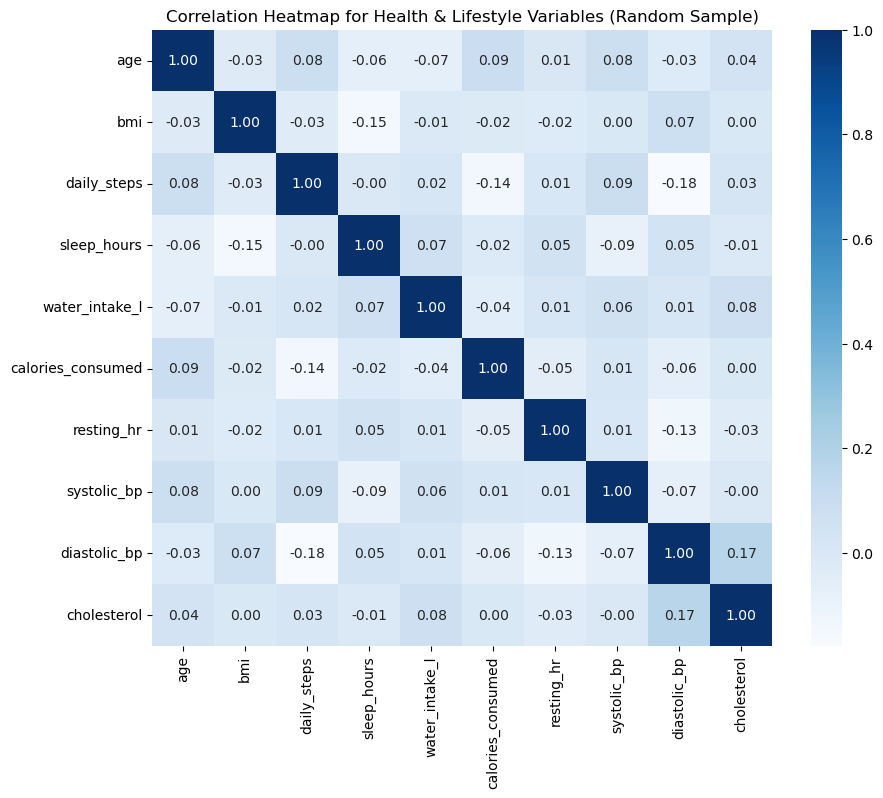

In [29]:
numeric_cols = [
    'age',
    'bmi',
    'daily_steps',
    'sleep_hours',
    'water_intake_l',
    'calories_consumed',
    'resting_hr',
    'systolic_bp',
    'diastolic_bp',
    'cholesterol'
]

corr_matrix = ds[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='Blues')
plt.title('Correlation Heatmap for Health & Lifestyle Variables (Random Sample)')
plt.show()

In [30]:
#  Spearman Correlation: BMI & Cholesterol 
from scipy.stats import pearsonr
import pandas as pd

# Drop NA just in case
corr_data = ds[['bmi', 'cholesterol']].dropna()

# perform Spearman correlation test
r_spear, p_spear = spearmanr(corr_data['bmi'], corr_data['cholesterol'])
df_spear = len(corr_data) - 2

print("Spearman's Correlation Test (BMI vs Cholesterol):")
print(f"Spearman's Correlation Coefficient (r) = {r_spear:.4f}")
print(f"p-value = {p_spear:.4f}")
print(f"Degrees of freedom = {df_spear}")

if p_spear < 0.05:
    print("Conclusion: Since the p_spear is less than 0.05, we reject the null hypothesis.")
    print("There is a statistically significant correlation between BMI and Cholesterol.")
    
else:
    print("Conclusion: Since the p_spear is greater than 0.05, we accept the null hypothesis.")
    print("There is no statistically significant correlation between  BMI and Cholesterol")
    

Spearman's Correlation Test (BMI vs Cholesterol):
Spearman's Correlation Coefficient (r) = 0.0022
p-value = 0.9785
Degrees of freedom = 148
Conclusion: Since the p_spear is greater than 0.05, we accept the null hypothesis.
There is no statistically significant correlation between  BMI and Cholesterol


In [31]:
#  Pearson Correlation: BMI & Cholesterol 

r_pearson, p_pearson = pearsonr(corr_data['bmi'], corr_data['cholesterol'])
df_pearson = len(corr_data) - 2

print("Pearson Correlation Test (BMI vs Cholesterol):")
print(f"Pearson Correlation Coefficient (r) = {r_pearson:.4f}")
print(f"p-value = {p_pearson:.4f}")
print(f"Degrees of freedom = {df_pearson}")

if p_pearson < 0.05:
    print("Conclusion: Since the p_pearson is less than 0.05, we reject the null hypothesis.")
    print("There is a statistically significant correlation between BMI and Cholesterol.")
else:
    print("Conclusion: Since the p_spear is greater than 0.05, we accept the null hypothesis.")
    print("There is no statistically significant correlation between  BMI and Cholesterol")

Pearson Correlation Test (BMI vs Cholesterol):
Pearson Correlation Coefficient (r) = 0.0015
p-value = 0.9859
Degrees of freedom = 148
Conclusion: Since the p_spear is greater than 0.05, we accept the null hypothesis.
There is no statistically significant correlation between  BMI and Cholesterol


In [39]:
# Chi-square Test: Disease Risk vs Smoker 

contingency = pd.crosstab(data['disease_risk'], data['smoker'])
print(contingency)



smoker            0      1
disease_risk              
0             60092  15087
1             19814   5007


In [43]:
chi2, p_chi, dof_chi, expected = chi2_contingency(contingency)
print('chi2=%.3f, p_chi=%.3f' % (chi2, p_chi))

print(f"Chi-square statistic = {chi2:.3f}")
print(f"p-value = {p_chi:.3f}")
print(f"Degrees of freedom = {dof_chi}")


if p_chi < 0.05:
    print("Conclusion: Reject H0 Disease risk depends on smoking status.")
else:
    print("Conclusion: Fail to reject H0 Disease risk is independent of smoking status.")


chi2=0.120, p_chi=0.729
Chi-square statistic = 0.120
p-value = 0.729
Degrees of freedom = 1
Conclusion: Fail to reject H0 Disease risk is independent of smoking status.


In [47]:
#  One-sample t-test: Cholesterol of Smokers vs Overall Mean 

# Overall mean cholesterol (population reference)
overall_chol_mean = data['cholesterol'].mean()
print("Overall mean cholesterol:", overall_chol_mean)

# Cholesterol of smokers only (sample)
smoker_chol = data[data['smoker'] == 1]['cholesterol']

# Check normality (Shapiro test) 
stat_shap, p_shap = shapiro(smoker_chol)
print(f"Shapiro test for smoker cholesterol:")
print('stat_shap= %.3f , p_shap=%.3f' % (stat_shap,p_shap))

# One-sample t-test
t_stat, p_ttest = ttest_1samp(smoker_chol, overall_chol_mean)
df_ttest = len(smoker_chol) - 1

print("One-sample t-test: Smokers' Cholesterol vs Overall Mean")
print(f"t-statistic = {t_stat:.3f}")
print(f"p-value = {p_ttest:.3f}")
print(f"Degrees of freedom = {df_ttest}")

if p_ttest < 0.05:
    print("Conclusion: Reject H0 → Smokers have different mean cholesterol.")
else:
    print("Conclusion: Fail to reject H0 → No significant difference in mean cholesterol.")


Overall mean cholesterol: 224.30063
Shapiro test for smoker cholesterol:
stat_shap= 0.954 , p_shap=0.000
One-sample t-test: Smokers' Cholesterol vs Overall Mean
t-statistic = 0.283
p-value = 0.777
Degrees of freedom = 20093
Conclusion: Fail to reject H0 → No significant difference in mean cholesterol.
